In [138]:
#Importamos las librerias

import pandas as pd

from sklearn import linear_model

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot       as plt

In [2]:
# Leemos el código
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Hacemos las dummies
data = pd.get_dummies(df,drop_first=True)

In [4]:
data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [8]:
data.shape

(1338, 9)

In [14]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [10]:
# Sacamos los features
features = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest']

In [18]:
# Dividimos la info
X = data[features]
Y = data.charges

In [19]:
# Divimos en test y train 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [28]:
# Escalamos min max
scaler = MinMaxScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7
0,0.695652,0.281141,0.0,1.0,0.0,1.0,0.0,0.0
1,0.065217,0.280872,0.2,0.0,0.0,0.0,0.0,1.0
2,0.152174,0.276029,0.0,1.0,0.0,0.0,0.0,0.0
3,0.695652,0.328222,0.6,0.0,0.0,0.0,1.0,0.0
4,0.717391,0.638687,0.2,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
931,0.913043,0.348130,0.0,1.0,0.0,0.0,0.0,1.0
932,0.173913,0.360371,0.4,0.0,0.0,0.0,0.0,0.0
933,0.717391,0.511165,0.4,0.0,1.0,0.0,0.0,0.0
934,0.478261,0.168415,0.4,0.0,1.0,0.0,1.0,0.0


In [124]:
# Hacemos la primera regresión lineal, 

lr = linear_model.SGDRegressor( penalty='none',n_iter_no_change= 1000)
lr.fit(X_train_scaled, Y_train)
preds_test = lr.predict(X_test_scaled)
data.charges.mean(),mean_squared_error(Y_test, preds_test, squared=False), mean_squared_error(Y_test, preds_test, squared=False)/data.charges.mean()

# Teniendo en cuenta que el modelo SGDRegressor utiliza el gradiente decendiente por default, este sería la regresión lineal que busca minimizar el error de predicción. Obtenemos
# un error porcentual de 45%, calculado a partir del RMSE y la media de charges, lo cual es un error bastante alto, casi de la mitad del promedio de los charges

/Users/salomonnovoamontenegro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(13270.422265141257, 6063.40624951856, 0.45691132718857896)

In [66]:
# Se polinomizan las variables

poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)
pd.DataFrame(X_test_poly)


,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,1.0,0.021739,0.526500,0.0,1.0,0.0,1.0,0.0,0.0,0.000473,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.847826,0.419155,0.0,1.0,0.0,1.0,0.0,0.0,0.718809,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.717391,0.566048,0.0,1.0,0.0,0.0,0.0,1.0,0.514650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.673913,0.556094,0.6,0.0,0.0,0.0,1.0,0.0,0.454159,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.065217,0.170568,0.2,1.0,0.0,0.0,0.0,1.0,0.004253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1.0,0.847826,0.672182,0.0,1.0,0.0,0.0,0.0,0.0,0.718809,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,1.0,0.043478,0.466505,0.0,0.0,0.0,0.0,0.0,1.0,0.001890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
399,1.0,0.043478,0.345036,0.0,0.0,0.0,0.0,0.0,0.0,0.001890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400,1.0,0.173913,0.298628,0.0,1.0,1.0,0.0,1.0,0.0,0.030246,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [125]:
# Se hacen pruebas para armar el ciclo de hiperparámetros y resutlados
lr = linear_model.SGDRegressor(alpha=0.0001,  eta0=0.01, penalty='none',n_iter_no_change= 1000)
#lr = linear_model.SGDRegressor(alpha=0.0001,  eta0=0.01, penalty='elasticnet',n_iter_no_change= 20)

In [126]:
lr.fit(X_train_poly, Y_train)

/Users/salomonnovoamontenegro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(n_iter_no_change=1000, penalty='none')

In [127]:
preds_train = lr.predict(X_train_poly)
preds_test = lr.predict(X_test_poly)

In [128]:
data.charges.mean(),mean_squared_error(Y_train, preds_train, squared=False), mean_squared_error(Y_train, preds_train, squared=False)/data.charges.mean()

(13270.422265141257, 4629.504705068348, 0.34885888425940526)

In [129]:
data.charges.mean(),mean_squared_error(Y_test, preds_test, squared=False), mean_squared_error(Y_test, preds_test, squared=False)/data.charges.mean()

(13270.422265141257, 4827.675756756294, 0.3637921733234994)

In [ ]:
# Al comparar los resultados de los errores del train y del test, se evidencia que no hay overfitting, 1. Porque en la información de train, los coeficientes no tienen
# un comportamiento que permita predecir muy bien los charges, tiene un error % de 35% y para la parte test, el error ed de 36%, lo cual es muy parecido al de train, por lo cual
# no cumple con las caracteristicas para ser determinado como overfitting

In [73]:
# Se crean los hiperparámentros

polinomio = [1,2,3,4]
penalidad = ['l2', 'l1', 'elasticnet','none']
alpha = [0.1,0.01,0.001,0.0001]

In [120]:
# Se crean los ciclos con los hiperparámetros y resultados

results = pd.DataFrame()
df_2 = pd.DataFrame()
for i in polinomio:
    poly = PolynomialFeatures(i)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.fit_transform(X_test_scaled)
    for j in penalidad:
        for k in alpha:
            lr = linear_model.SGDRegressor(alpha=k, penalty=j,n_iter_no_change= 1000000)
            lr.fit(X_train_poly, Y_train)
            preds_test = lr.predict(X_test_poly)
            error_percet=mean_squared_error(Y_test, preds_test, squared=False)/data.charges.mean()
            
            df_2 = [[i, j,k,error_percet]]
            df2 = pd.DataFrame(df_2,columns=['poly', 'pen', 'alpha','error_percet'])

            #results = pd.concat(results,df_2)
#            results.append(df_2)

            results=pd.concat([results, df2], ignore_index=True)
#            results = pd.concat(df_2)

            
            #df_2['poly'] = i
            #df_2['pen'] = j
            #df_2['alpha'] = k
            #df_2['error_percet'] = error_percet

#            results = results.append(df_2, ignore_index=True)

#            print(str(i)+' '+j+' '+str(k)+' '+str(error_percet))

/Users/salomonnovoamontenegro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/salomonnovoamontenegro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/salomonnovoamontenegro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/salomonnovoamontenegro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

In [121]:
# Se escogen los hiperparámentros que ofrecen el menor error %, el cual es de 35%, 10% menor que la regresión inicial

results[results.error_percet ==results.error_percet.min() ]

,poly,pen,alpha,error_percet
27,3,l2,0.0001,0.358713


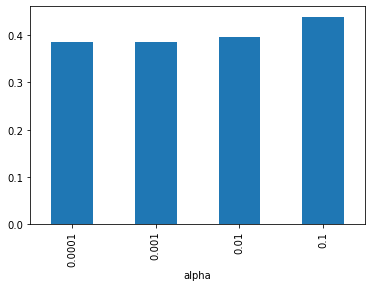

In [140]:

results.groupby('alpha')['error_percet'].mean().plot.bar()

plt.show()

<AxesSubplot:xlabel='pen'>

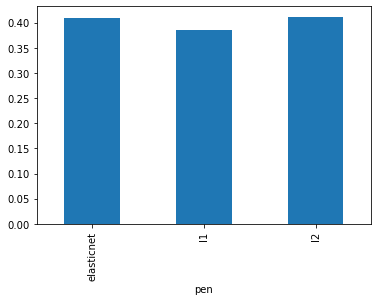

In [141]:

results.groupby('pen')['error_percet'].mean().plot.bar()

<AxesSubplot:xlabel='poly'>

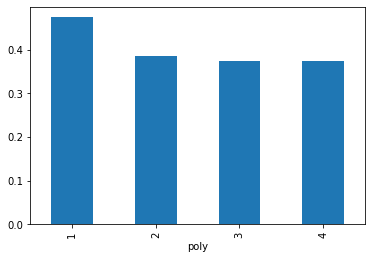

In [142]:


results.groupby('poly')['error_percet'].mean().plot.bar()

Respuestas concisas (Las explicaciones más extensas están en cada parte del análisis):
1. No es aceptable el error obtenido incialmente, teniendo en cuenta que es un error % de 45%, muy cercano a la mitad, lo cual lo hace muy alto
2. No no hay evidencia de overfitting, por la predicción de los coeficientes de train y la comparación del resutlado de y_train con y_test
3. Si, si fue posible con Polinomización grado 3, Pnalización L2, Alpha = 0.0001, se logró un error % de 36%, 9% menos
4. El hiperparámetro que parece mostrar la mayor de diferencia en los errores, es el grado de polinomio; este análisis no se hace anivel de coeficiente, teniendo en cuenta que el mejor resultado es con polinomio grado 3, por lo cual no se puede concluir, sobre los coeficientes "ceteris paribus" 